<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    98.043815  72.086425  ...  489.084010   401.618712
      1.0    36.689410  81.014814  ...  228.762152  -245.906016
      2.0    87.892518  29.100020  ...  287.127724   206.835862
      3.0    95.735264  67.846155  ...  444.985790   488.556705
      4.0    39.265423  97.838233  ...  263.902198  1325.064031
...                ...        ...  ...         ...          ...
999.0 115.0  56.802466  71.572655  ...   17.873550    98.255525
      116.0  64.939244  66.852571  ...   34.930373  1138.539113
      117.0  47.226686  20.974205  ...  294.454571  -184.149399
      118.0  65.112653  59.336204  ...   25.908218   995.527729
      119.0  31.967974  60.002660  ...  161.412368  1270.388960

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    98.043815  72.086425  ...  489.084010   401.618712
      1.0    36.689410  81.014814  ...  228.762152  -245.906016
      2.0    87.892518  29.100020  ...  287.127724   206.835862
      3.0    95.735264  67.846155  ...  444.985790   488.556705
      4.0    39.265423  97.838233  ...  263.902198  1325.064031
...                ...        ...  ...         ...          ...
999.0 115.0  56.802466  71.572655  ...   17.873550    98.255525
      116.0  64.939244  66.852571  ...   34.930373  1138.539113
      117.0  47.226686  20.974205  ...  294.454571  -184.149399
      118.0  65.112653  59.336204  ...   25.908218   995.527729
      119.0  31.967974  60.002660  ...  161.412368  1270.388960

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    98.043815  72.086425  ...  489.084010   401.618712
      1.0    36.689410  81.014814  ...  228.762152  -245.906016
      2.0    87.892518  29.100020  ...  287.127724   206.835862
      3.0    95.735264  67.846155  ...  444.985790   488.556705
      4.0    39.265423  97.838233  ...  263.902198  1325.064031
...                ...        ...  ...         ...          ...
999.0 115.0  56.802466  71.572655  ...   17.873550    98.255525
      116.0  64.939244  66.852571  ...   34.930373  1138.539113
      117.0  47.226686  20.974205  ...  294.454571  -184.149399
      118.0  65.112653  59.336204  ...   25.908218   995.527729
      119.0  31.967974  60.002660  ...  161.412368  1270.388960

[120000 rows x 7 columns]

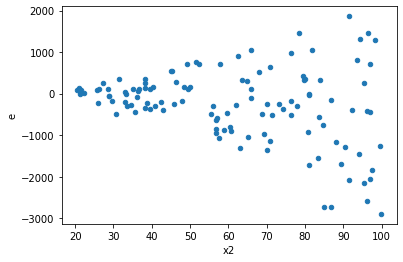

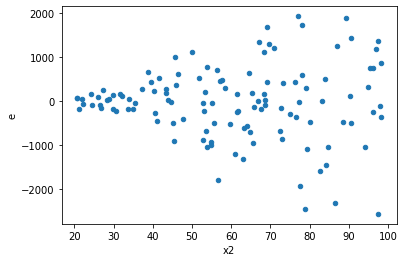

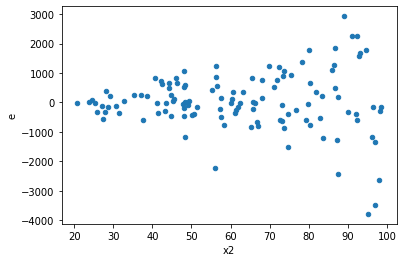

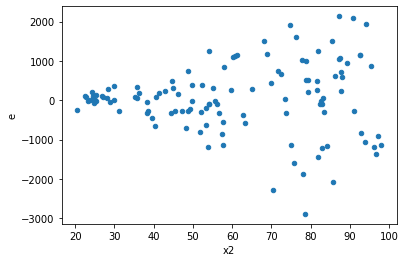

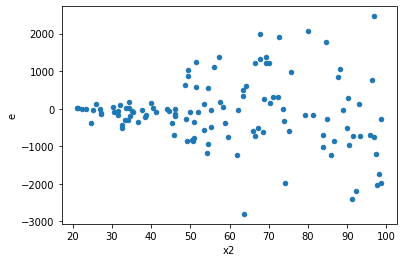

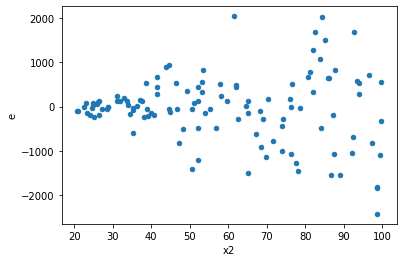

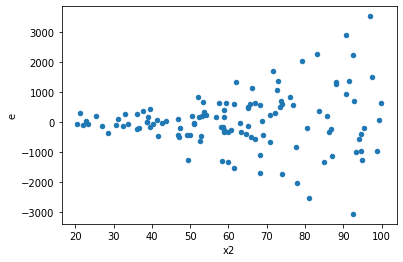

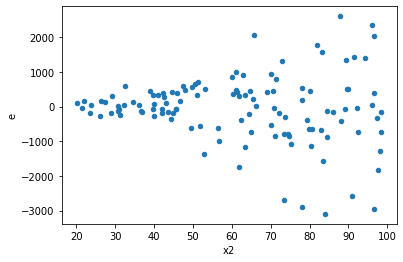

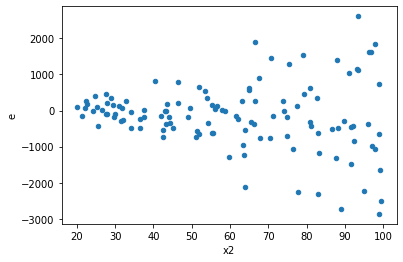

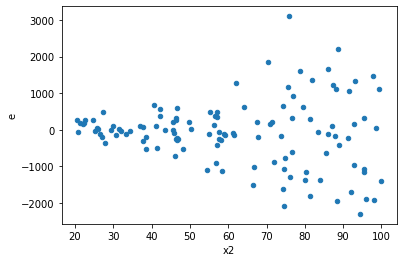

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,4512344.934361396,57143771.07543369,100274.3318746977,1269861.5794540818,12.663874749531061,2.4646951146678475e-14,0.9999999999999877,1.2323475573339238e-14,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,5045773.059376821,62803500.78012087,112128.2902083738,1395633.3506693528,12.446754945391348,3.441691376337985e-14,0.9999999999999828,1.7208456881689926e-14,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,6239420.626938752,62688427.17316509,138653.79170975005,1393076.1594036687,10.047155164136116,2.001065979584382e-12,0.9999999999989995,1.000532989792191e-12,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3811492.456310356,85817325.57461116,84699.83236245236,1907051.6794358036,22.515412678445916,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,4605899.643131088,70497168.55488987,102353.32540291308,1566603.7456642194,15.305841207379396,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,6742115.1541489735,55271532.377174765,149824.78120331053,1228256.275048328,8.197951401521477,8.172440502107747e-11,0.9999999999591378,4.0862202510538737e-11,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,5272550.627110785,85846001.48982608,117167.791713573,1907688.9219961353,16.28168367856287,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,4850836.353397037,92676167.55748746,107796.36340882305,2059470.390166388,19.10519358019291,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3979361.704658661,105334778.93826161,88430.2601035258,2340772.8652947024,26.47027004731578,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,4512344.934361396,57143771.07543369,100274.3318746977,1269861.5794540818,12.663874749531061,2.4646951146678475e-14,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,5045773.059376821,62803500.78012087,112128.2902083738,1395633.3506693528,12.446754945391348,3.441691376337985e-14,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,6239420.626938752,62688427.17316509,138653.79170975005,1393076.1594036687,10.047155164136116,2.001065979584382e-12,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3811492.456310356,85817325.57461116,84699.83236245236,1907051.6794358036,22.515412678445916,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,4605899.643131088,70497168.55488987,102353.32540291308,1566603.7456642194,15.305841207379396,6.661338147750939e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,6742115.1541489735,55271532.377174765,149824.78120331053,1228256.275048328,8.197951401521477,8.172440502107747e-11,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,5272550.627110785,85846001.48982608,117167.791713573,1907688.9219961353,16.28168367856287,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,4850836.353397037,92676167.55748746,107796.36340882305,2059470.390166388,19.10519358019291,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3979361.704658661,105334778.93826161,88430.2601035258,2340772.8652947024,26.47027004731578,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64